In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings
from scipy.stats.mstats import winsorize

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

In [3]:
education_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [4]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]
states = education_df["STATE"].unique()

for state in states:
    education_df.loc[education_df["STATE"] == state, fill_list] = education_df.loc[education_df["STATE"] == state, fill_list].interpolate()

education_df.dropna(inplace=True)

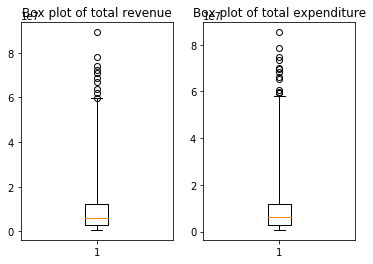

In [5]:
plt.subplot(1,2,1)
plt.boxplot(education_df["TOTAL_REVENUE"], whis = 5)
plt.title("Box plot of total revenue")

plt.subplot(1,2,2)
plt.boxplot(education_df["TOTAL_EXPENDITURE"], whis = 5)
plt.title("Box plot of total expenditure")
plt.show()

Text(0.5, 1.0, 'Box plot of winsorized total revenue')

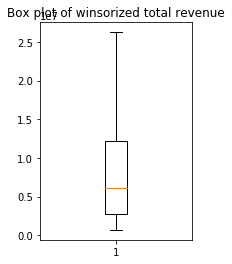

In [8]:
#use winsorize to eliminate any outliers
winsorized_revenue = winsorize(education_df["TOTAL_REVENUE"], (0, 0.1))
plt.subplot(1,2,1)
plt.boxplot(winsorized_revenue, whis = 5)
plt.title("Box plot of winsorized total revenue")

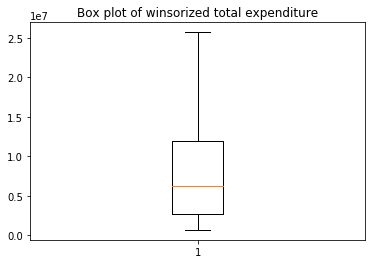

In [10]:
winsorized_expenditure = winsorize(education_df["TOTAL_EXPENDITURE"], (0, 0.1))
plt.boxplot(winsorized_expenditure, whis = 5)
plt.title("Box plot of winsorized total expenditure")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1fb505c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1fb50cc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1fb50470>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1fb5a390>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1fb5a6d8>],
 'means': []}

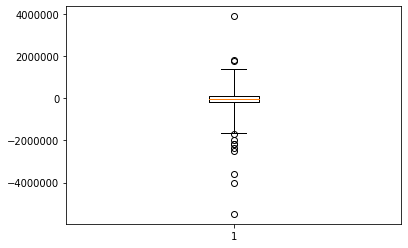

In [12]:
budget_deficit = education_df.TOTAL_REVENUE - education_df.TOTAL_EXPENDITURE
plt.boxplot(budget_deficit, whis = 5)


{'whiskers': [<matplotlib.lines.Line2D at 0x1a1fcf02e8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1fd16198>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1fd0a940>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1fd16828>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1fd16b70>],
 'means': []}

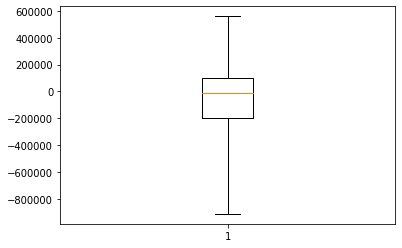

In [14]:
winsorized_budget = winsorize(budget_deficit, (0.05, 0.05))
plt.boxplot(winsorized_budget, whis = 5)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1f92dd68>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1fa679b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1fa517b8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1fa67668>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1f934978>],
 'means': []}

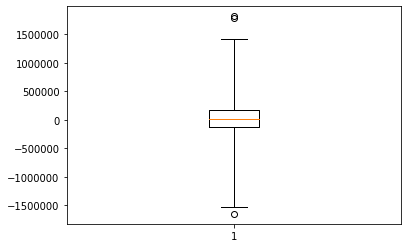

In [15]:
budget_deficit2 = winsorized_revenue - winsorized_expenditure
plt.boxplot(budget_deficit2, whis = 5)

{'whiskers': [<matplotlib.lines.Line2D at 0x11da0eb00>,
 'caps': [<matplotlib.lines.Line2D at 0x11da36748>,
 'boxes': [<matplotlib.lines.Line2D at 0x11da36128>],
 'medians': [<matplotlib.lines.Line2D at 0x11daeafd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x11daf77b8>],
 'means': []}

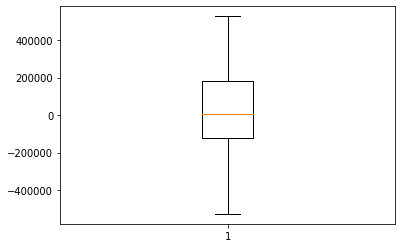

In [16]:
winsorized_budget2 = winsorize(budget_deficit2, (0.05, 0.05))
plt.boxplot(winsorized_budget2, whis = 5)

In [17]:
pd.DataFrame({"original_budget": budget_deficit, "winsorized_budget1": winsorized_budget,
              "winsorized_budget2": winsorized_budget2}).describe()

,original_budget,winsorized_budget1,winsorized_budget2
count,4.660000e+02,466.000000,466.000000
mean,-8.094882e+04,-58733.012876,42601.083691
std,6.144222e+05,341300.816505,287393.469948
min,-5.487742e+06,-913765.000000,-526142.000000
25%,-1.965748e+05,-196574.750000,-123882.250000
50%,-8.872500e+03,-8872.500000,8133.500000
75%,1.013948e+05,101394.750000,180287.250000
max,3.897129e+06,560511.000000,526078.000000


Winsorization is probably the most desire method, but in any case, it is better to we must observe the data closely and create visualization of what we want to find to see what methods will be best suitable. 